In [1]:
import torch
import pandas as pd
from src.utils import load_checkpoint
from src.scaler import Scaler
from src.dataset import TimeSeriesDataset
from src.forecast_models import LSTMForecaster
from src.train import train, inference

input_field = ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT']
output_field = ['OT']
timeseries_field = list(set(input_field + output_field))
datasetPath = 'data/ETTh1'
t = 24
h = 12

if torch.cuda.is_available():
    device =  torch.device('cuda')
else:
    device =  torch.device('cpu')

train_df = pd.read_csv(f'{datasetPath}/train.csv')
test_df = pd.read_csv(f'{datasetPath}/test.csv')
val_df = pd.read_csv(f'{datasetPath}/val.csv')
scaler = Scaler(train_df[timeseries_field], 'minmax')

train_dataset = TimeSeriesDataset(train_df, input_field, output_field, t=t, h=h, scaler=scaler)
test_dataset = TimeSeriesDataset(test_df, input_field, output_field, t=t, h=h, scaler=scaler)
val_dataset = TimeSeriesDataset(val_df, input_field, output_field, t=t, h=h, scaler=scaler)

model = LSTMForecaster(input_size=len(input_field), output_size=len(output_field)*h, hidden_size=256, num_layers=2)

model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr = 1e-5)
criterion = torch.nn.L1Loss()

startEpoch = 0
nEpochs = 30

for epoch in range(startEpoch+1, nEpochs+1):
    epoch_train_loss = train(train_dataset, model, 
                            criterion, optimizer, 
                            device, 1024, epoch)
    epoch_val_loss = inference(val_dataset, model, 
                            criterion, device, 
                            1024)
    
    print('Epoch {} completed: \nTrain loss: {:.4f} \nValidation loss: {:.4f}'.format(
        epoch, epoch_train_loss, epoch_val_loss))

Epoch 1 completed: 
Train loss: 0.4027 
Validation loss: 0.1510
Epoch 2 completed: 
Train loss: 0.3991 
Validation loss: 0.1472
Epoch 3 completed: 
Train loss: 0.3948 
Validation loss: 0.1428


KeyboardInterrupt: 

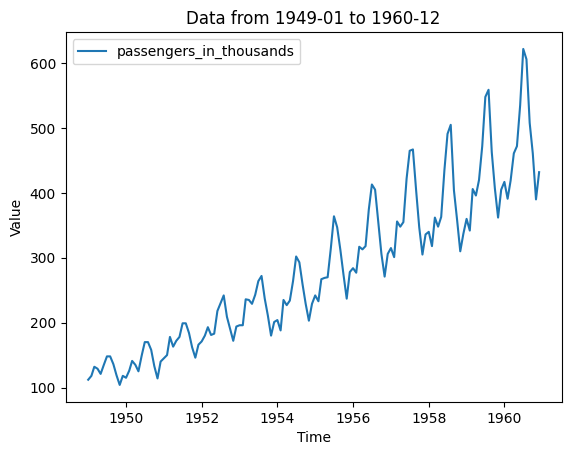

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/airline/airline.csv')

def plot_csv_by_time(csv_path, start_time, end_time):
    # Load CSV file into a pandas dataframe
    df = pd.read_csv(csv_path,parse_dates=['Month'],  index_col=['Month'])
    
    # Select rows within the specified time range
    df = df.loc[start_time:end_time]
    
    # Generate a line plot for each column in the dataframe
    for col in df.columns:
        plt.plot(df.index, df[col], label=col)
    
    # Set plot title and axis labels
    plt.title(f"Data from {start_time} to {end_time}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    
    # Display legend and show plot
    plt.legend()
    plt.show()


plot_csv_by_time('data/airline/airline.csv', '1949-01', '1960-12')

In [1]:
import torch
import pandas as pd
from src.utils import load_checkpoint
from src.scaler import Scaler
from src.dataset import TimeSeriesDataset
from src.forecast_models import LSTMForecaster
from src.train import train, inference

input_field = ['passengers_in_thousands']
output_field = ['passengers_in_thousands']
timeseries_field = list(set(input_field + output_field))
datasetPath = 'data/airline'
t = 16
h = 4

if torch.cuda.is_available():
    device =  torch.device('cuda')
else:
    device =  torch.device('cpu')

train_df = pd.read_csv(f'{datasetPath}/train.csv')
test_df = pd.read_csv(f'{datasetPath}/test.csv')
val_df = pd.read_csv(f'{datasetPath}/val.csv')
scaler = Scaler(train_df[timeseries_field], 'minmax')

train_dataset = TimeSeriesDataset(train_df, input_field, output_field, t=t, h=h, scaler=scaler)
test_dataset = TimeSeriesDataset(test_df, input_field, output_field, t=t, h=h, scaler=scaler)
val_dataset = TimeSeriesDataset(val_df, input_field, output_field, t=t, h=h, scaler=scaler)

modelPath = 'out/LSTMForecaster_airline/n1_hs128_h4_t16/best.pth.tar'
model = LSTMForecaster(input_size=len(input_field), output_size=len(output_field)*h, hidden_size=128, num_layers=1)
model.to(device)

load_checkpoint(modelPath, model)

criterion = torch.nn.L1Loss()

=> loaded checkpoint 'True' (epoch 861)
Checkpoint's train loss is: 0.2498
Checkpoint's validation loss is: 0.4345


In [2]:
inference(test_dataset, model, criterion, device, 1024)

0.08202113211154938

In [3]:
test_dataset.predict(model)

,Month,passengers_in_thousands,passengers_in_thousands_pred
0,NaN,0.812298,NaN
1,NaN,1.029126,NaN
2,NaN,1.168285,NaN
3,NaN,1.174757,NaN
4,NaN,0.970874,NaN
5,NaN,0.786408,NaN
6,NaN,0.650485,NaN
7,NaN,0.750809,NaN
8,NaN,0.763754,NaN
9,NaN,0.692557,NaN


In [4]:
test_dataset.plot_forecast_result()

AttributeError: 'list' object attribute 'append' is read-only

In [13]:
scaler.min['passgeners_in_thousands_pred'] = scaler.min['passengers_in_thousands']

In [14]:
scaler.min

passengers_in_thousands         104
passgeners_in_thousands_pred    104
dtype: int64

In [11]:
scaler.data.min()

passengers_in_thousands    104
dtype: int64